In [9]:
# 데이터 전처리

# 1. 표준화
# - 자료에 선형 변환을 적용하여 전체 자료를 평균 0, 분산 1이 되도록 만드는 과정
# - overflow 나 underflow를 방지하기 위함
# - scale(X): 표준정규분포 스케일
# - robust_scale(X): meadian 사용, Outlier의 영향 최소화
# - minmax_scale(X): 최대/최소값 사용
# - maxabs_scale(X): 최대 절대값 사용

# 표준화 1
from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale
import numpy as np
import pandas as pd

x = (np.arange(10, dtype=np.float64) - 3).reshape(-1, 1)
print(x)
print()

df = pd.DataFrame(np.hstack([x, scale(x), robust_scale(x), minmax_scale(x), maxabs_scale(x)]),
                  columns=['x', 'scale(x)', 'robust_scale(x)', 'minmax_scale(x)', 'maxabs_scale(x)'])
print(df)

[[-3.]
 [-2.]
 [-1.]
 [ 0.]
 [ 1.]
 [ 2.]
 [ 3.]
 [ 4.]
 [ 5.]
 [ 6.]]

     x  scale(x)  robust_scale(x)  minmax_scale(x)  maxabs_scale(x)
0 -3.0 -1.566699        -1.000000         0.000000        -0.500000
1 -2.0 -1.218544        -0.777778         0.111111        -0.333333
2 -1.0 -0.870388        -0.555556         0.222222        -0.166667
3  0.0 -0.522233        -0.333333         0.333333         0.000000
4  1.0 -0.174078        -0.111111         0.444444         0.166667
5  2.0  0.174078         0.111111         0.555556         0.333333
6  3.0  0.522233         0.333333         0.666667         0.500000
7  4.0  0.870388         0.555556         0.777778         0.666667
8  5.0  1.218544         0.777778         0.888889         0.833333
9  6.0  1.566699         1.000000         1.000000         1.000000


In [14]:
# 표준화 2
from sklearn.datasets import load_iris
iris = load_iris()
data1 = iris.data
data2 = scale(iris.data)
data3 = minmax_scale(data1)

print('old mean:', np.mean(data1, axis=0))
print('old std:', np.std(data1, axis=0))
print('new mean:', np.mean(data2, axis=0)) # 0 에 가까운 엄청나게 작은 숫자들 = 0
print('new std:', np.std(data2, axis=0))
print('new mean:', np.mean(data3, axis=0)) 
print('new std:', np.std(data3, axis=0))

old mean: [5.84333333 3.05733333 3.758      1.19933333]
old std: [0.82530129 0.43441097 1.75940407 0.75969263]
new mean: [-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]
new std: [1. 1. 1. 1.]
new mean: [0.4287037  0.44055556 0.46745763 0.45805556]
new std: [0.22925036 0.18100457 0.29820408 0.31653859]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


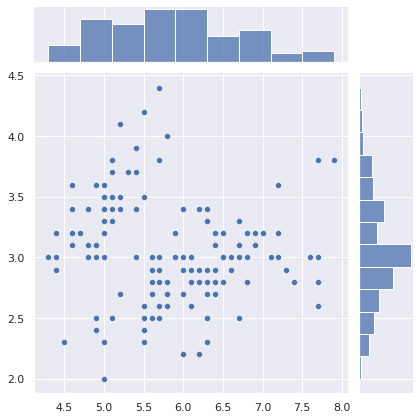

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


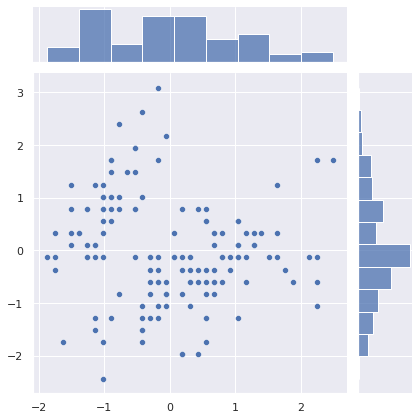

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


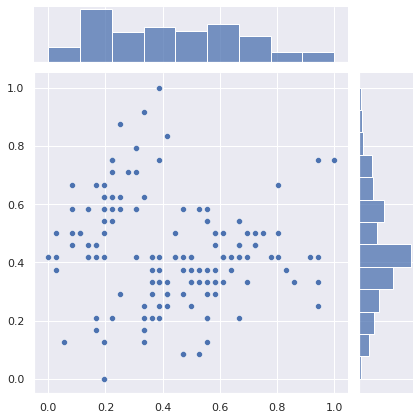

In [15]:
# 표준화 3 => 그래프 모양은 같지만 x,y축이 다름
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
sns.jointplot(data1[:,0], data1[:,1])
plt.show()

sns.jointplot(data2[:,0], data2[:,1])
plt.show()
sns.jointplot(data3[:,0], data3[:,1])
plt.show()